#### Pipeline
The pipelines are a great and easy way to use models for inference

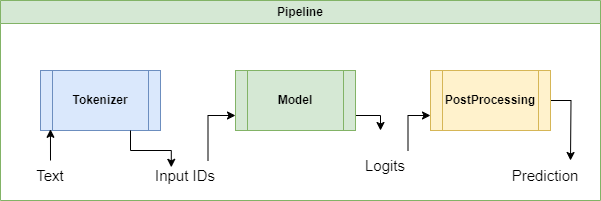

### Tokenizer

In [1]:
from transformers import AutoTokenizer

In [2]:
tokenizer=AutoTokenizer.from_pretrained("bert-base-cased")

In [3]:
sent1="Generative AI refers to artificial intelligence models that can generate new content, such as text, images, or music" 

In [4]:
sent1

'Generative AI refers to artificial intelligence models that can generate new content, such as text, images, or music'

In [5]:
result=tokenizer(sent1)

In [6]:
result

{'input_ids': [101, 9066, 15306, 19016, 4431, 1106, 8246, 4810, 3584, 1115, 1169, 9509, 1207, 3438, 117, 1216, 1112, 3087, 117, 4351, 117, 1137, 1390, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

#### Example :2

In [7]:
# Example sentences
sentence_a = "Hello, how are you?"
sentence_b = "I am fine, thank you."

In [8]:
result_2=tokenizer(sentence_a,sentence_b,padding=True,truncation=True)

In [9]:
result_2

{'input_ids': [101, 8667, 117, 1293, 1132, 1128, 136, 102, 146, 1821, 2503, 117, 6243, 1128, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokenizer.decode(result_2["input_ids"])

'[CLS] Hello, how are you? [SEP] I am fine, thank you. [SEP]'

In [13]:
from transformers import pipeline
import warnings
warnings.filterwarnings("ignore")

C:\Users\verma\anaconda3\envs\llm_env\lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


#### Task
1.Text classification
2.Text generation
3.Summarization
4.Image classification
5.Image segmentation
6.Object detection
7.Visual question answering
8.Document question answering
9.Image captioning

In [11]:
#task_pipeline=pipeline(model="model")

In [14]:
classifier = pipeline("sentiment-analysis")
classifier(
    [
        "i am very happy ",
        "learning transformers is not very difficult",
    ]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998795986175537},
 {'label': 'NEGATIVE', 'score': 0.9017388820648193}]

In [15]:
classifier = pipeline("sentiment-analysis",model="roberta-large-mnli")
classifier(
    [
        "i am very happy ",
        "learning transformers is not very difficult",
    ]
)

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'NEUTRAL', 'score': 0.5182392597198486},
 {'label': 'NEUTRAL', 'score': 0.6210756897926331}]

##### zero-shot-classification

In [16]:
classifier = pipeline('zero-shot-classification', model='roberta-large-mnli')

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
sequence_to_classify = "what do want to eat while travelling by train"
candidate_labels = ['travel', 'cooking', 'dancing','education']
classifier(sequence_to_classify, candidate_labels)


{'sequence': 'what do want to eat while travelling by train',
 'labels': ['travel', 'cooking', 'dancing', 'education'],
 'scores': [0.8697652816772461,
  0.10905522108078003,
  0.010797790251672268,
  0.010381652973592281]}